In [1]:
import numpy as np
import gvar as gv
import lsqfit
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import time
from importlib import reload

sys.path.append("../")
from fitter import data_loader as dl
from fitter import misc as ms
from fitter import model_average as md
from fitter import fitter as fit

for j in range(10): # Sometimes this needs to be loaded twice...
    matplotlib.rcParams['figure.figsize'] = [10, 10]

In [2]:
reload(fit)
reload(dl)
reload(ms)
reload(md)

<module 'fitter.model_average' from '../fitter/model_average.py'>

In [3]:
data_loader = dl.data_loader()
fit_results = data_loader.get_fit_info()
other_results = data_loader.get_fit_info('other_results.csv')

In [4]:
model_average = md.model_average(fit_results)

In [5]:
# Default prior: 1.1816146689940248, 0.004646089658202027, 0.0038707693196171223
model_average.average()

1.1848(78)

In [7]:
model_average.average(split_unc=True)

[1.1847568705162668, 0.0044389731729688195, 0.006376919461733499]

In [8]:
model_average.average(split_unc=True, param='delta_su2')

[-0.003936014392724492, 0.000694076051118404, 0.00017862519500043072]

### Make plots

In [7]:
model_average.plot_fits('a');

In [9]:
model_average.plot_histogram('FK/Fpi');

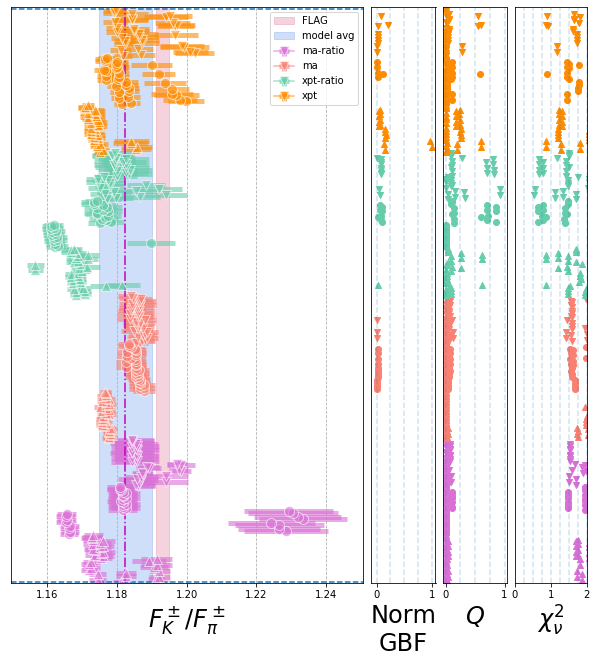

In [10]:
model_average.plot_comparison(other_results=other_results, param='FK/Fpi_pm')

In [62]:
model_average.fit_results['ma-ratio_FKFK_nnlo']

{'Unnamed: 0': 96,
 'name': 'ma-ratio_FKFK_nnlo',
 'FK/Fpi': '1.1835(22)',
 'delta_su2': '-0.00390(68)',
 'logGBF': 49.062086144675035,
 'chi2/df': 2.459374849755579,
 'Q': 0.000967960649776293,
 'vol': 0,
 'L_4': '-0.001778(38)',
 'L_5': '0.00100(12)',
 'L_1': nan,
 'L_2': nan,
 'L_3': nan,
 'L_6': nan,
 'L_7': nan,
 'L_8': nan,
 'L_9': nan,
 'A_a': '4.11(34)',
 'A_k': '-0.21(58)',
 'A_p': '-0.34(60)',
 'A_loga': nan,
 'A_aa': nan,
 'prior': {'A_a': 0.0(4.1),
  'A_k': 0.00(66),
  'A_p': 0.00(66),
  'L_4': 0.0000(50),
  'L_5': 0.0000(50)},
 'posterior': {'A_a': 4.11(34),
  'A_k': -0.21(58),
  'A_p': -0.34(60),
  'L_4': -0.001778(38),
  'L_5': 0.00100(12)},
 'FK/Fpi_pm': 1.1812(22)}

In [78]:
def error_budget(self):
    error = dict()
    
    #for base_model in np.unique([self._get_model_info_from_name(name)['base'] for name in self.fit_results]):
    for model in list(self.fit_results)[:5]:
        print(model)
        prior = self.fit_results[model]['prior']
        for lec in prior:
            fk_fpi = self.fit_results[model]['FK/Fpi']
            print(fk_fpi)
            #print(lec, fk_fpi.partialsdev(prior[lec]))
        
    

error_budget(model_average)



ma-ratio_FKFK_nnlo
1.1835(22)
1.1835(22)
1.1835(22)
1.1835(22)
1.1835(22)


NameError: name 's' is not defined

In [96]:
# Problematic fit:
#{'fit': 'nnlo', 'exclude': [], 'vol': 10, 'include_alpha_s': False, 'include_latt_n3lo': True, 'include_log': True, 'include_log2': True, 'include_sunset': True}


In [92]:
a = {}

In [93]:
a.setdefault('hi', 10)

10

In [89]:
m = gv.gvar(0.1, 0.01)
v = gv.gvar(50, 0.5)
E = 0.5 *m *v**2

print(E.sdev, E.partialsdev([m, v]))

12.747548783981962 12.747548783981962


In [ ]:
1184   {'chiral': 2.1129629629629427,'spacing_n2lo': 5.692592592592558,'spacing_n3lo': 0.0555555555555558}

In [ ]:
    tmp = fit_e.report_phys_point(phys_point)['phys']
    Lchi_phys = phys_point['Lchi_'+FPK]
    p_phys = dict()
    p_phys[('phys','p2')] = phys_point['mpi']**2 / Lchi_phys**2
    p_phys[('phys','k2')] = phys_point['mk']**2 / Lchi_phys**2
    p_phys[('phys','e2')] = 4./3*p_phys[('phys','k2')] - 1./3 * p_phys[('phys','p2')]
    print('stat',tmp.partialsdev(fit_e.fit.y))
    for i in range(1,9):
        print('L'+str(i), fit_e.fit.p['L'+str(i)], tmp.partialsdev(fit_e.fit.prior['L'+str(i)]))
    for lec in ['p_4','k_4','s_4','saS_4','s_6']:
        if lec in fit_e.fit.prior:
            print(lec, fit_e.fit.p[lec], tmp.partialsdev(fit_e.fit.prior[lec]))
    print('phys point','e_piSq = %s, e_KSq = %s'
        %(str(p_phys[('phys','p2')]),str(p_phys[('phys','k2')])), \
            tmp.partialsdev(p_phys[('phys','p2')],p_phys[('phys','k2')]))

In [ ]:
def error_budget(s,result_list):
    err = dict()
    for ansatz_truncate in s['ansatz']['type']:
        result = result_list[ansatz_truncate]
        fit = result['fit']
        prior = fit.prior
        priorc = result['phys']['priorc']
        phys = result['phys']['result']
        statistical = phys.partialsdev(fit.y,priorc['epi'],priorc['ed'])
        # compile chiral and discretization and finite volume lists then splat as function input
        X_list = []
        d_list = []
        k_list = []
        v_list = []
        at = ansatz_truncate.split('_')
        ansatz = at[0]
        n = int(at[1])
        for key in prior.keys():
            ks = key.split('_')
            k = ks[-1]
            if k[0] in ['c','g'] and ansatz_truncate in key:
                X_list.append(prior[key])
                k_list.append(key)
            if k[0] in ['a','s','b'] and ansatz_truncate in key:
                d_list.append(prior[key])
                k_list.append(key)
            if s['ansatz']['FVn'] is 3 and k[0] in ['f'] and ansatz_truncate in key:
                v_list.append(prior[key])
                k_list.append(key)
        chiral      = phys.partialsdev(*X_list)
        disc        = phys.partialsdev(*d_list)
        if s['ansatz']['FVn'] is 3:
            fv = phys.partialsdev(*v_list)
        else:
            fv = 0
        pct = {'stat':[statistical/phys.mean*100],'chiral':[chiral/phys.mean*100],'disc':[disc/phys.mean*100],'fv':[fv/phys.mean*100],'total':[phys.sdev/phys.mean*100]}
        std = {'stat':statistical,'chiral':chiral,'disc':disc,'fv':fv,'total':phys.sdev}
        err[ansatz_truncate] = {'pct':pct,'std':std,'mean':phys.mean}
    return err